In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

df = pd.read_csv('data/train.csv')

# shape and data types of the data
print(df.shape)
print(df.dtypes)

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(len(numeric_cols))

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(len(non_numeric_cols))

(8068, 11)
ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object
4
7


<Axes: >

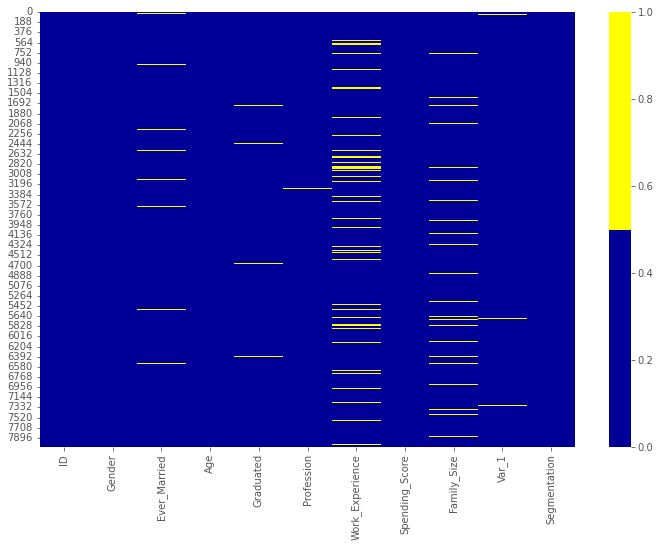

In [3]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [4]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

ID - 0%
Gender - 0%
Ever_Married - 2%
Age - 0%
Graduated - 1%
Profession - 2%
Work_Experience - 10%
Spending_Score - 0%
Family_Size - 4%
Var_1 - 1%
Segmentation - 0%


created missing indicator for: Ever_Married
created missing indicator for: Graduated
created missing indicator for: Profession
created missing indicator for: Work_Experience
created missing indicator for: Family_Size
created missing indicator for: Var_1


<Axes: xlabel='index'>

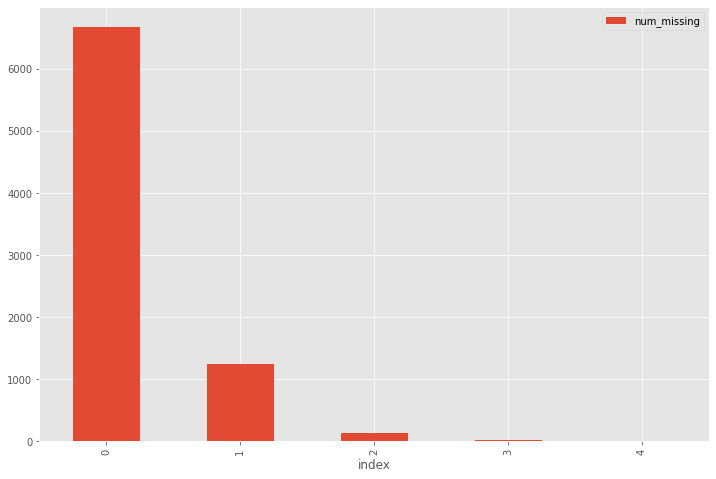

In [5]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [6]:
ind_missing = df[df['num_missing'] > 35].index
df_less_missing_rows = df.drop(ind_missing, axis=0)

In [7]:
df_less_missing_rows

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Ever_Married_ismissing,Graduated_ismissing,Profession_ismissing,Work_Experience_ismissing,Family_Size_ismissing,Var_1_ismissing,num_missing
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,False,False,False,False,False,False,0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,False,False,False,True,False,False,1
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,False,False,False,False,False,False,0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,False,False,False,False,False,False,0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,False,False,False,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D,False,False,True,False,False,False,1
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D,False,False,False,False,False,False,0
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D,False,False,False,False,False,False,0
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B,False,False,False,False,False,False,0


In [8]:
# impute the missing values and create the missing value indicator variables for each non-numeric column.
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)

imputing missing values for: Ever_Married
imputing missing values for: Graduated
imputing missing values for: Profession
imputing missing values for: Var_1
